# Re-Training a Network in Browser

Follow the instructions in the next few steps to complete the training project without running out of memory on your nano. Make sure to consult the lessons in canvas for more detailed explanations about what is going on.

1. Run the cell below to copy the code you need to run this project.


In [1]:
!git clone https://github.com/dusty-nv/pytorch-ssd.git; ls

Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 1007, done.
remote: Counting objects: 100% (528/528), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1007 (delta 491), reused 470 (delta 470), pack-reused 479 (from 1)
Receiving objects: 100% (1007/1007), 1.10 MiB | 4.90 MiB/s, done.
Resolving deltas: 100% (673/673), done.
pytorch-ssd  sample_data  Squirrels.zip


2. Run the next cell to change directories into the directory where all the new code is, and install any required libraries to the runtime.

In [2]:
!cd pytorch-ssd; pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.2 MB/s eta 0:00:00


3. Run the next cell to download the cat_dog data into the data directory and unzip it

In [10]:
!cd pytorch-ssd/data; unzip *.zip -d .

Archive:  Squirrels.zip
   creating: ./Squirrels/
   creating: ./Squirrels/ImageSets/
  inflating: ./Squirrels/ImageSets/.DS_Store  
   creating: ./Squirrels/ImageSets/Main/
  inflating: ./Squirrels/ImageSets/Main/.DS_Store  
  inflating: ./Squirrels/ImageSets/Main/train.txt  
  inflating: ./Squirrels/ImageSets/Main/test.txt  
  inflating: ./Squirrels/ImageSets/Main/val.txt  
  inflating: ./Squirrels/.DS_Store   
 extracting: ./Squirrels/labels.txt  
   creating: ./Squirrels/Annotations/
  inflating: ./Squirrels/Annotations/OIP-_flk9r3BRf3VxU5zWSep5QHaE8.xml  
  inflating: ./Squirrels/Annotations/OIP-_jpMl-tHPdybTv67n6nNiQHaE5.xml  
  inflating: ./Squirrels/Annotations/OIP-_5bWJ7SoPigN4PgV6UozJAHaEo.xml  
  inflating: ./Squirrels/Annotations/OIP-_cwStB4RUBpoAm0dmJ0hIAHaFj.xml  
  inflating: ./Squirrels/Annotations/OIP-_7pz-4WgSloa6KRjq6DozAHaFj.xml  
  inflating: ./Squirrels/Annotations/OIP-_b7M9TMyyPRiNxAbf_EmkQHaE8.xml  
  inflating: ./Squirrels/Annotations/OIP-_etMNqBBhvthcoMi5V2zCQ

4. Change into the pytorch-classification directory and run the train script using the cat_dog dataset.

This cell will take a long time to run so be patient.

In [11]:
!cd pytorch-ssd; python3 train_ssd.py --dataset-type=voc --batch-size=30 --model-dir=models/Squirrels --data=data/Squirrels

2024-11-26 03:27:27.875380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 03:27:27.894584: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 03:27:27.900565: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 03:27:27.914858: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 03:27:28.886824: W tensorflow/compiler/tf2

In [9]:
rm -rf pytorch-ssd/data/*

When the cell above is finished running, you can move the trained network back to the nano. There you can run the export script and then you should be able to use your newly trained network on your nano.

#Transfer the Network

Follow the steps below to transfer the network over to your nano.

1. In the files sidebar, open **pytorch-classification**. 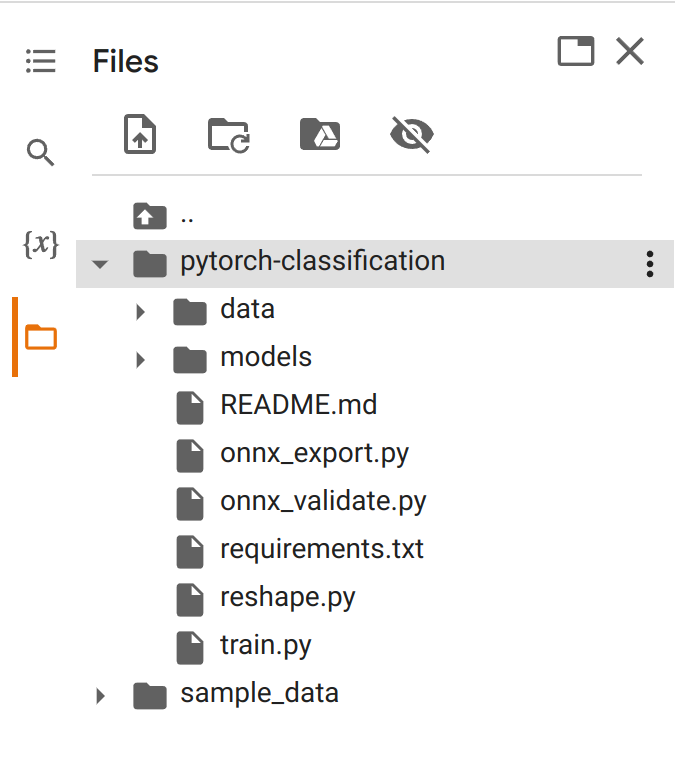
2. Under **models/cat_dog** you should see a file called model_best.pth.tar. Click the three dots next to that file, and select **Download**

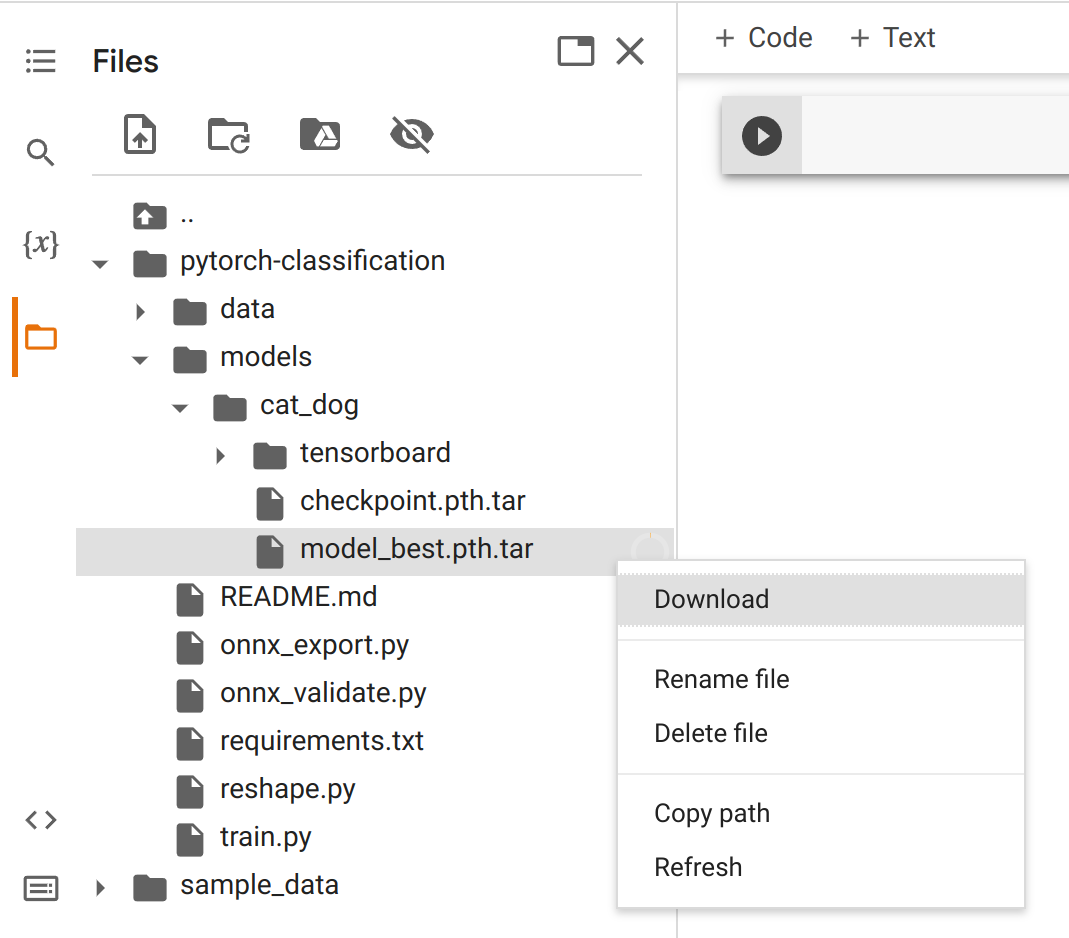

3. When the file downloads, make sure it's still named properly (it should be called **model_best.pth.tar**)
4. Open VSCode, and navigate to **/home/nvidia/jetson-inference/python/training/classification/models/cat_dog**. Drag and drop the downloaded file to the open directory in VSCode.
5. In the terminal, change directories into **/jetson-inference/python/training/classification/**.
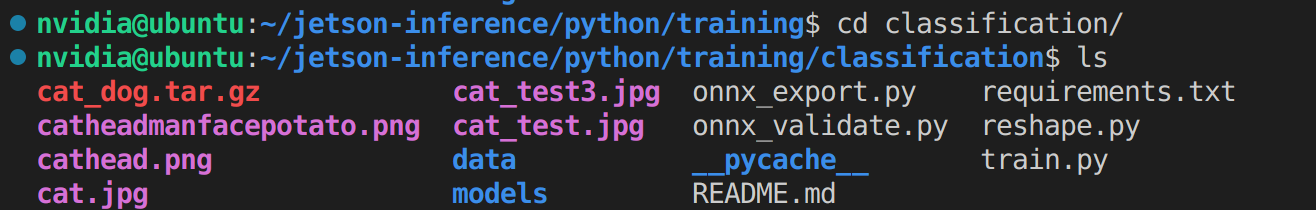

6. Use `ls models/cat_dog/` to make sure there is a best model file in that directory.
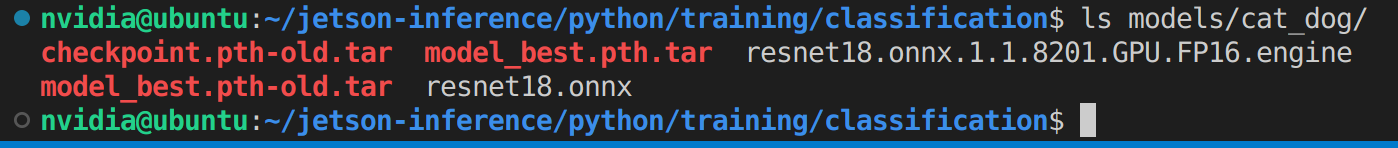

7. Run `python3 onnx_export.py --model-dir=models/cat_dog` to export the model.

8. Look in **jetson-inference/python/training/classification/models/cat_dog** to see your exported new model.

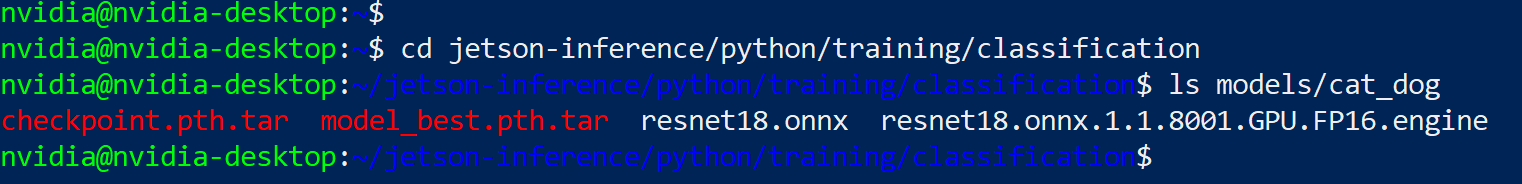

9. Use `ls models/cat_dog/` to make sure that the model is on the nano. You should see a file called **resnet18.onnx**.

10. Set the NET and DATASET variables
  * `NET=models/cat_dog`
  * `DATASET=data/cat_dog`

11. Run this command to see how it operates on an image from the cat folder.
`imagenet.py --model=$NET/resnet18.onnx --input_blob=input_0 --output_blob=output_0 --labels=$DATASET/labels.txt $DATASET/test/cat/01.jpg cat.jpg`

12. Open the new image in VSCode to see how your network works.